# Understanding and Improving Deep Convolutional Networks

## Plot the learning curves

During learning, the model will store the loss function evaluated in each epoch. Looking at the learning curves can tell us quite a bit about the learning process

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# loading CIFAR10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(x_train.shape[1:])))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(8, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 31, 15)        195       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 15)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         488       
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1569      
Total params: 2,252
Trainable params: 2,252
Non-trainable params: 0
_________________________________________________________________


In [4]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [5]:
# Fit the model to training data 
training = model.fit(x_train, y_train, 
          validation_split=0.2, 
          epochs=3, batch_size=10)

Epoch 1/3
4000/4000 [==============================] - 51s 13ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 2/3
4000/4000 [==============================] - 45s 11ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 3/3
4000/4000 [==============================] - 41s 10ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014


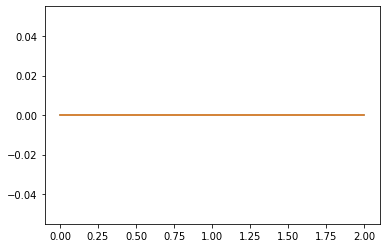

In [6]:
# Extract the history from the training object
history = training.history

# Plot the training loss 
plt.plot(history['loss'])
# Plot the validation loss
plt.plot(history['val_loss'])

# Show the figure
plt.show()

## Regularization

### Dropout Regularization

Dropout is a form of regularization that removes a different random subset of the units in a layer in each round of training.

In [7]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(x_train.shape[1:])))

# Dropout Regularization
model.add(Dropout(0.25))

# Add another convolutional layer
model.add(Conv2D(8, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 31, 31, 15)        195       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 15)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 8)         488       
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7201      
Total params: 7,884
Trainable params: 7,884
Non-trainable params: 0
_________________________________________________________________


### Batch Normalization

Batch normalization is another form of regularization that rescales the outputs of a layer to make sure that they have mean 0 and standard deviation 1.

In [8]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(15, kernel_size=2, activation='relu', 
                 input_shape=(x_train.shape[1:])))

# Batch Regularization
model.add(BatchNormalization())

# Add another convolutional layer
model.add(Conv2D(8, kernel_size=2, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 31, 31, 15)        195       
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 15)        60        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 8)         488       
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7201      
Total params: 7,944
Trainable params: 7,914
Non-trainable params: 30
_________________________________________________________________


Be careful when using them together!
The disharmony between dropout and batch normalization

## Interpreting the model

In [9]:
model = Sequential()

# Add a convolutional layer
model.add(Conv2D(30, kernel_size=4, activation='relu', 
                 input_shape=(x_train.shape[1:])))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(30, kernel_size=4, activation='relu'))

# Add a pooling operation
model.add(MaxPool2D(2))

# Add another convolutional layer
model.add(Conv2D(30, kernel_size=4, activation='relu'))

# Flatten and feed to output layer
model.add(Flatten())
model.add(Dense(y_train.shape[1], activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 29, 29, 30)        1470      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 30)        14430     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 30)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 30)          14430     
_________________________________________________________________
flatten_3 (Flatten)          (None, 120)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [10]:
# Compile model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [11]:
# Fit the model to training data 
training = model.fit(x_train, y_train, 
          validation_split=0.2, 
          epochs=10, batch_size=100)

Epoch 1/10
400/400 [==============================] - 48s 120ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 2/10
400/400 [==============================] - 53s 133ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 3/10
400/400 [==============================] - 46s 114ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 4/10
400/400 [==============================] - 45s 114ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 5/10
400/400 [==============================] - 40s 101ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 6/10
400/400 [==============================] - 36s 91ms/step - loss: 0.0000e+00 - accuracy: 0.0997 - val_loss: 0.0000e+00 - val_accuracy: 0.1014
Epoch 7/10
400/400 [==============================] - 36s 91ms/step - loss: 0.0000e

In [12]:
# selecting the layers

model.layers

### Getting model weights

In [13]:
conv1 = model.layers[0]
weights1 = conv1.get_weights()
kernels1 = weights1[0]
# first two dimensions are kernel size, 
# third dimension are number of channels in the kernel,
# the last dimension are the number of kernels in this layer
kernels1.shape

(4, 4, 3, 30)

### Visualizing the kernel

One way to interpret models is to examine the properties of the kernels in the convolutional layers.

In [14]:
kernel1_1 = kernels1[:, :,
                     :, 0]
kernel1_1.shape

(4, 4, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


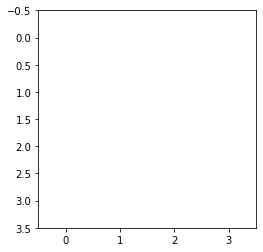

In [15]:
plt.imshow(kernel1_1)

### Visualizing the kernel responses

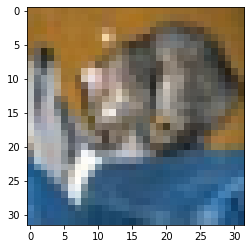

In [35]:
test_image = x_test[0,:,:,:]
plt.imshow(test_image)

In [36]:
def convolution(image, kernel):
    kernel = kernel - kernel.mean()
    result = np.zeros(image.shape)

    for ii in range(image.shape[0]-4):
        for jj in range(image.shape[1]-4):
            result[ii, jj] = np.sum(image[ii:ii+4, jj:jj+4] * kernel)
    return result

In [37]:
# Convolve with the fourth image in test_data
out = convolution(test_image, kernel1_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


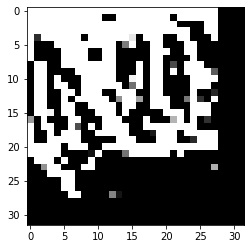

In [38]:
# Visualize the result
plt.imshow(out)
plt.show()